# Space-time visualisations (giddy)

## Install libraries

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} nodejs

Solving environment: done

# All requested packages already installed.



In [1]:
import sys
!conda install --yes --prefix {sys.prefix} geopandas
!conda install --yes --prefix {sys.prefix} libpysal
!conda install --yes --prefix {sys.prefix} mapclassify
!conda install --yes --prefix {sys.prefix} splot
!conda install --yes --prefix {sys.prefix} legendgram
!conda install --yes --prefix {sys.prefix} esda
!conda install --yes --prefix {sys.prefix} inequality
!conda install --yes --prefix {sys.prefix} giddy
!conda install --yes --prefix {sys.prefix} ipywidgets

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /Users/carlos/anaconda3

  added / updated specs:
    - legendgram


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    legendgram-0.0.3           |             py_1           9 KB  conda-forge
    ------------------------------------------------------------
                                           Total:           9 KB

The following NEW packages will be INSTALLED:

  legendgram         conda-forge/noarch::legendgram-0.0.3-py_1
  palettable         conda-forge/noarch::palettable-3.3.0-py_0



legendgram-0.0.3     | 9 KB      | ########

## Load libraries

In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from libpysal.weights.contiguity import Queen
from libpysal import examples

from giddy.directional import Rose

import splot
from splot.esda import plot_moran
from splot.esda import moran_scatterplot
from splot.esda import lisa_cluster
from splot.esda import plot_local_autocorrelation
from splot.esda import plot_moran_bv_simulation, plot_moran_bv

import esda
from esda.moran import Moran
from esda.moran import Moran_Local
from esda.moran import Moran_BV, Moran_Local_BV


from ipywidgets import interact, fixed
import ipywidgets as widgets

from scipy.stats.kde import gaussian_kde

import os

#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-darkgrid')
#plt.style.use('seaborn-dark')
#plt.style.use('bmh')

/Users/carlos/anaconda3/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 10005. The TBB threading layer is disabled.
  warnings.warn(problem)


## Data prepration

### Import datasets

In [3]:
# get csv and shp and merge
shp_link = examples.get_path('us48.shp')
df = gpd.read_file(shp_link)
income_table = pd.read_csv(examples.get_path("usjoin.csv"))

In [4]:
df

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,20.750,34.956,1,1,Washington,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615..."
1,45.132,34.527,2,2,Montana,30,Mtn,MT,"POLYGON ((-111.47463 44.70224, -111.48001 44.6..."
2,9.571,18.899,3,3,Maine,23,N Eng,ME,"MULTIPOLYGON (((-69.77779 44.07407, -69.86044 ..."
3,21.874,21.353,4,4,North Dakota,38,W N Cen,ND,"POLYGON ((-98.73006 45.93830, -99.00645 45.939..."
4,22.598,22.746,5,5,South Dakota,46,W N Cen,SD,"POLYGON ((-102.78793 42.99532, -103.00541 42.9..."
5,27.966,21.987,6,6,Wyoming,56,Mtn,WY,"POLYGON ((-104.05311 41.69825, -104.05499 41.5..."
6,16.477,21.891,7,7,Wisconsin,55,E N Cen,WI,"MULTIPOLYGON (((-87.74845 44.96163, -87.83989 ..."
7,24.391,28.529,8,8,Idaho,16,Mtn,ID,"POLYGON ((-117.02531 43.67915, -117.02280 43.7..."
8,2.794,8.450,9,9,Vermont,50,N Eng,VT,"POLYGON ((-73.25851 42.74598, -73.26972 42.747..."
9,25.577,29.510,10,10,Minnesota,27,W N Cen,MN,"POLYGON ((-91.73022 43.49960, -92.07737 43.499..."


In [5]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [6]:
income_table

,Name,STATE_FIPS,1929,1930,1931,1932,1933,1934,1935,1936,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Alabama,1,323,267,224,162,166,211,217,251,...,23471,24467,25161,26065,27665,29097,30634,31988,32819,32274
1,Arizona,4,600,520,429,321,308,362,416,462,...,25578,26232,26469,27106,28753,30671,32552,33470,33445,32077
2,Arkansas,5,310,228,215,157,157,187,207,247,...,22257,23532,23929,25074,26465,27512,29041,31070,31800,31493
3,California,6,991,887,749,580,546,603,660,771,...,32275,32750,32900,33801,35663,37463,40169,41943,42377,40902
4,Colorado,8,634,578,471,354,353,368,444,542,...,32949,34228,33963,34092,35543,37388,39662,41165,41719,40093
5,Connecticut,9,1024,921,801,620,583,653,706,806,...,40640,42279,42021,42398,45009,47022,51133,53930,54528,52736
6,Delaware,10,1032,857,775,590,564,645,701,868,...,31255,32664,33463,34123,35998,37297,39358,40251,40698,40135
7,Florida,12,518,470,398,319,288,348,376,450,...,28145,28852,29499,30277,32462,34460,36934,37781,37808,36565
8,Georgia,13,347,307,256,200,204,244,268,302,...,27940,28596,28660,29060,29995,31498,32739,33895,34127,33086
9,Idaho,16,507,503,374,274,227,403,399,475,...,24180,25124,25485,25912,27846,29003,30954,32168,32322,30987


In [7]:
type(income_table)

pandas.core.frame.DataFrame

## Time series

In [8]:
incomeValues = income_table.iloc[:,2:]
incomeValues.shape

(48, 81)

In [9]:
Y = np.array(incomeValues.values)
Y.shape

(48, 81)

In [10]:
years = np.arange(1929,2010)
years.shape

(81,)

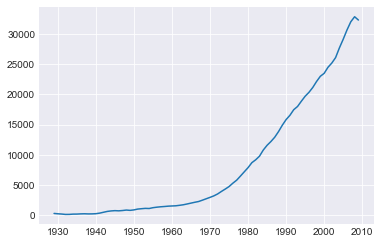

In [11]:
# plot Alabama
plt.plot(years,Y[0])

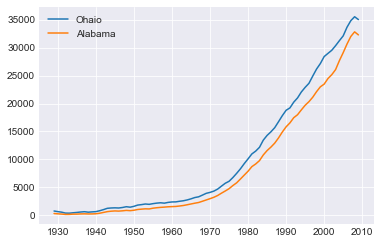

In [12]:
# plot incomes of Ohaio and Alabama
plt.plot(years, Y[32], label='Ohaio')
plt.plot(years, Y[0],  label='Alabama')
plt.legend()

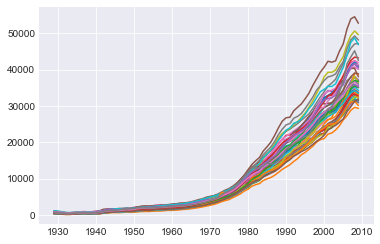

In [13]:
# plot all states (rows)
for row in Y:
    plt.plot(years, row)

### Compute relative values

In [14]:
RY = Y / Y.mean(axis=0)

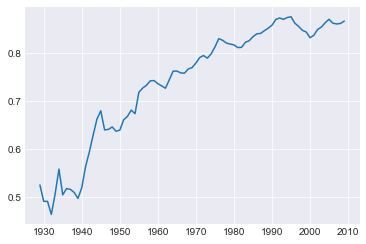

In [15]:
# plot Relative Income of Alabama
plt.plot(years,RY[0])

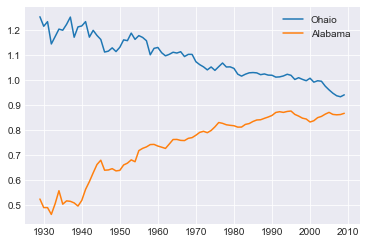

In [16]:
# plot relative incomes of Ohaio and Alabama
plt.plot(years, RY[32], label='Ohaio')
plt.plot(years, RY[0], label='Alabama')
plt.legend()

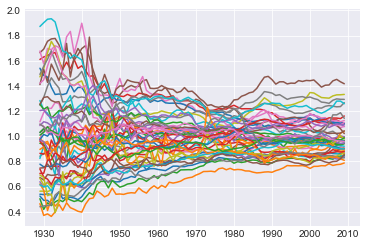

In [17]:
for row in RY:
    plt.plot(years, row)

## Kernel Density (univariate, aspatial)

In [18]:
# Distribution of relative income in 1929
d1929 = gaussian_kde(RY[:,0])

In [19]:
# Distribution of relative income in 2009
d2009 = gaussian_kde(RY[:,-1])

In [20]:
# Define domain of values
minR0 = RY.min()
maxR0 = RY.max()
x = np.linspace(minR0, maxR0, 100)

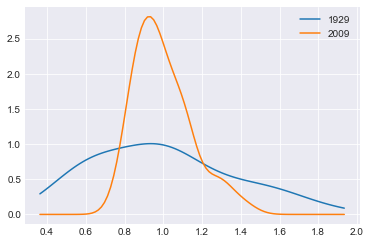

In [21]:
plt.plot(x, d1929(x), label='1929')
plt.plot(x, d2009(x), label='2009')
plt.legend()

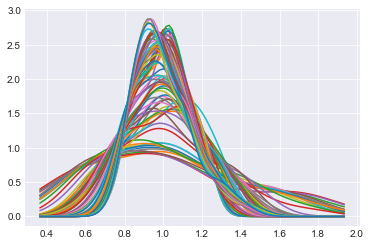

In [22]:
# Plotting all distributions
for cs in RY.T: # take cross sections
    plt.plot(x, gaussian_kde(cs)(x))

### Using seaborn

<AxesSubplot:ylabel='Density'>

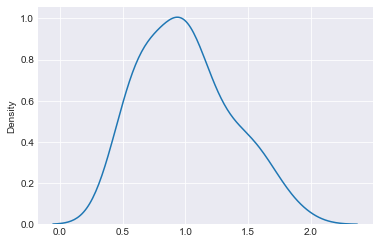

In [23]:
# Distribution of relative income in 1929
sns.kdeplot(RY[:,0])

<AxesSubplot:ylabel='Density'>

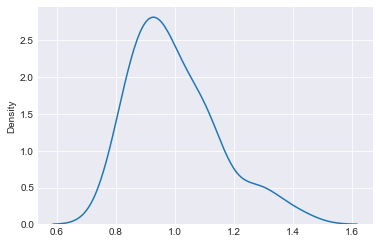

In [24]:
# Distribution of relative income in 2009
sns.kdeplot(RY[:,-1])

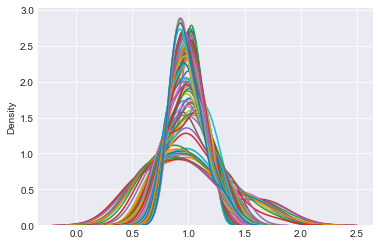

In [25]:
# Plotting all distributions
for y in range(2010-1929):
    sns.kdeplot(RY[:,y])

## Sigma convergence

Text(0.5, 1.0, 'Sigma-Convergence')

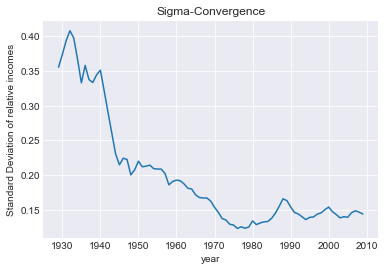

In [26]:
sigma = RY.std(axis=0)
plt.plot(years, sigma)
plt.ylabel('Standard Deviation of relative incomes')
plt.xlabel('year')
plt.title("Sigma-Convergence")

## Markov Chains

## Calculate relative values again

In [27]:
# calculate relative values
for year in range(1969, 2010):
    income_table[str(year) + '_rel'] = income_table[str(year)] / income_table[str(year)].mean()

In [28]:
income_table

,Name,STATE_FIPS,1929,1930,1931,1932,1933,1934,1935,1936,...,2000_rel,2001_rel,2002_rel,2003_rel,2004_rel,2005_rel,2006_rel,2007_rel,2008_rel,2009_rel
0,Alabama,1,323,267,224,162,166,211,217,251,...,0.832717,0.837863,0.850126,0.855097,0.864166,0.871194,0.863026,0.861483,0.862523,0.867464
1,Arizona,4,600,520,429,321,308,362,416,462,...,0.907470,0.898305,0.894320,0.889248,0.898152,0.918321,0.917061,0.901395,0.878975,0.862169
2,Arkansas,5,310,228,215,157,157,187,207,247,...,0.789646,0.805844,0.808500,0.822586,0.826682,0.823737,0.818148,0.836760,0.835742,0.846472
3,California,6,991,887,749,580,546,603,660,771,...,1.145069,1.121511,1.111607,1.108886,1.113998,1.121680,1.131648,1.129585,1.113718,1.099368
4,Colorado,8,634,578,471,354,353,368,444,542,...,1.168982,1.172125,1.147523,1.118433,1.110250,1.119435,1.117365,1.108632,1.096425,1.077623
5,Connecticut,9,1024,921,801,620,583,653,706,806,...,1.441847,1.447828,1.419782,1.390922,1.405937,1.407886,1.440528,1.452412,1.433061,1.417443
6,Delaware,10,1032,857,775,590,564,645,701,868,...,1.108881,1.118566,1.130629,1.119450,1.124462,1.116710,1.108800,1.084017,1.069592,1.078752
7,Florida,12,518,470,398,319,288,348,376,450,...,0.998543,0.988026,0.996696,0.993277,1.014009,1.031767,1.040511,1.017496,0.993639,0.982797
8,Georgia,13,347,307,256,200,204,244,268,302,...,0.991270,0.979259,0.968348,0.953351,0.936948,0.943082,0.922329,0.912841,0.896898,0.889289
9,Idaho,16,507,503,374,274,227,403,399,475,...,0.857871,0.860362,0.861073,0.850077,0.869820,0.868379,0.872041,0.866330,0.849461,0.832871


## Merge datasets

In [29]:
# merge
gdf = df.merge(income_table, left_on = 'STATE_NAME', right_on = 'Name')

In [30]:
gdf

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS_x,SUB_REGION,STATE_ABBR,geometry,Name,...,2000_rel,2001_rel,2002_rel,2003_rel,2004_rel,2005_rel,2006_rel,2007_rel,2008_rel,2009_rel
0,20.750,34.956,1,1,Washington,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615...",Washington,...,1.118567,1.097643,1.088158,1.080443,1.092788,1.070032,1.083981,1.098318,1.092982,1.091761
1,45.132,34.527,2,2,Montana,30,Mtn,MT,"POLYGON ((-111.47463 44.70224, -111.48001 44.6...",Montana,...,0.800715,0.833583,0.834516,0.851750,0.859543,0.867900,0.871703,0.878638,0.874980,0.878887
2,9.571,18.899,3,3,Maine,23,N Eng,ME,"MULTIPOLYGON (((-69.77779 44.07407, -69.86044 ...",Maine,...,0.909066,0.926933,0.936960,0.942427,0.943383,0.919818,0.911088,0.905435,0.917371,0.947937
3,21.874,21.353,4,4,North Dakota,38,W N Cen,ND,"POLYGON ((-98.73006 45.93830, -99.00645 45.939...",North Dakota,...,0.889376,0.894401,0.904490,0.954959,0.926983,0.947454,0.925625,0.966354,1.025203,1.039430
4,22.598,22.746,5,5,South Dakota,46,W N Cen,SD,"POLYGON ((-102.78793 42.99532, -103.00541 42.9...",South Dakota,...,0.926522,0.942789,0.936825,0.986551,0.992237,0.979850,0.938697,0.969478,1.003626,0.981024
5,27.966,21.987,6,6,Wyoming,56,Mtn,WY,"POLYGON ((-104.05311 41.69825, -104.05499 41.5...",Wyoming,...,0.966080,0.997272,1.007812,1.034842,1.053336,1.098326,1.170497,1.170252,1.187306,1.142426
6,16.477,21.891,7,7,Wisconsin,55,E N Cen,WI,"MULTIPOLYGON (((-87.74845 44.96163, -87.83989 ...",Wisconsin,...,1.001630,0.998607,1.008150,1.005743,0.990300,0.976826,0.972926,0.965196,0.961734,0.958903
7,24.391,28.529,8,8,Idaho,16,Mtn,ID,"POLYGON ((-117.02531 43.67915, -117.02280 43.7...",Idaho,...,0.857871,0.860362,0.861073,0.850077,0.869820,0.868379,0.872041,0.866330,0.849461,0.832871
8,2.794,8.450,9,9,Vermont,50,N Eng,VT,"POLYGON ((-73.25851 42.74598, -73.26972 42.747...",Vermont,...,0.954408,0.963644,0.968044,0.971362,0.975838,0.955717,0.968954,0.970016,0.970827,0.987824
9,25.577,29.510,10,10,Minnesota,27,W N Cen,MN,"POLYGON ((-91.73022 43.49960, -92.07737 43.499...",Minnesota,...,1.138896,1.124422,1.133670,1.139823,1.140299,1.119794,1.109054,1.105778,1.111668,1.099852


In [31]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

## Spatial analysis

### Create spatial weights and data for two points in time

In [32]:
#retrieve spatial weights and data for two points in time
w = Queen.from_dataframe(gdf)

In [33]:
w

In [34]:
w.transform = 'r'

In [35]:
y1 = gdf['1969_rel'].values
y2 = gdf['2000_rel'].values

In [36]:
y1 # This is a raw vector

array([1.14848363, 0.92058097, 0.88021445, 0.85554602, 0.8395676 ,
       1.00467789, 1.05149184, 0.91637612, 0.94973457, 1.05934089,
       1.03074794, 1.04952958, 1.02373986, 1.17931917, 1.00131401,
       1.2903271 , 1.06943252, 1.35872593, 1.08344867, 1.2684619 ,
       1.04111989, 1.26706029, 0.86984249, 1.27266675, 1.10279097,
       1.22052666, 1.2393083 , 0.78434396, 1.17987981, 1.03327084,
       0.83283985, 0.99458626, 0.99738949, 0.99823046, 0.9780472 ,
       0.89647319, 0.85526569, 0.83171856, 0.94552972, 0.81882369,
       0.7703278 , 0.67501796, 0.88638155, 0.79247333, 0.73416613,
       0.81321723, 1.02570212, 1.16193913])

### Global spatial autocorrelation

In [37]:
moranY1 = Moran(y1, w)
moranY1.I

0.4694254433969317

In [38]:
moranY2 = Moran(y2, w)
moranY2.I

0.34395743331461265

Our value for the statistic is interpreted against a reference distribution under the null hypothesis of complete spatial randomness. PySAL uses the approach of random spatial permutations.

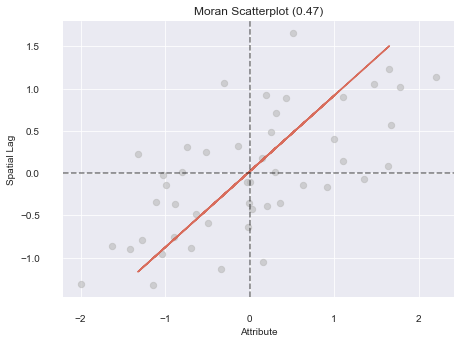

In [39]:
fig, ax = moran_scatterplot(moranY1, aspect_equal=True)
plt.show()

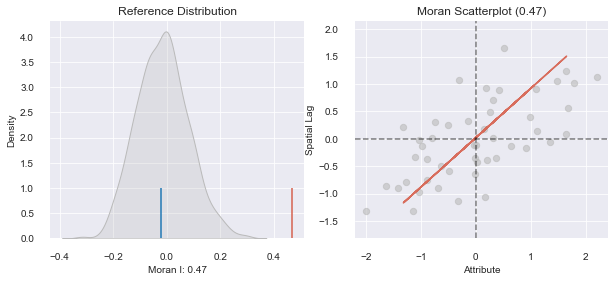

In [40]:
plot_moran(moranY1, zstandard=True, figsize=(10,4))
plt.show()

In [41]:
moranY1.p_sim

0.001

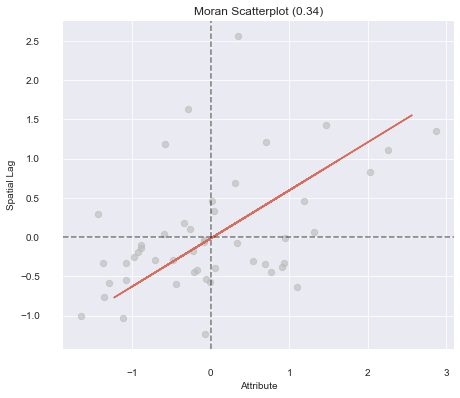

In [42]:
fig, ax = moran_scatterplot(moranY2, aspect_equal=True)
plt.show()

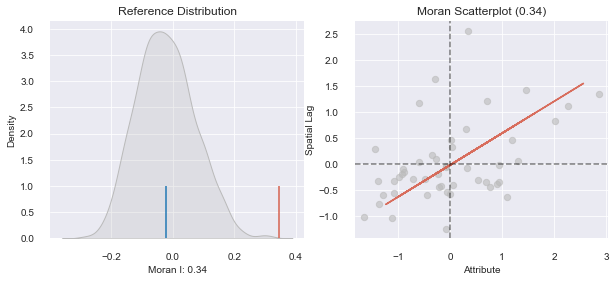

In [43]:
plot_moran(moranY2, zstandard=True, figsize=(10,4))
plt.show()

In [44]:
moranY2.p_sim

0.001

#### Global moran over time

In [45]:
mits = [Moran(cs, w) for cs in RY.T]

In [46]:
res = np.array([(m.I, m.EI, m.p_sim, m.z_sim) for m in mits])

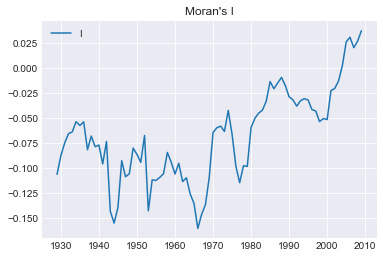

In [47]:
plt.plot(years, res[:,0], label='I')
plt.title("Moran's I")
plt.legend()

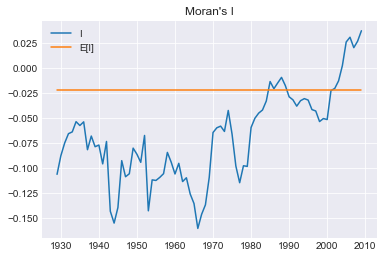

In [48]:
plt.plot(years, res[:,0], label='I')
plt.plot(years, res[:,1], label='E[I]')
plt.title("Moran's I")
plt.legend()

Text(0.5, 1.0, 'z-values, I')

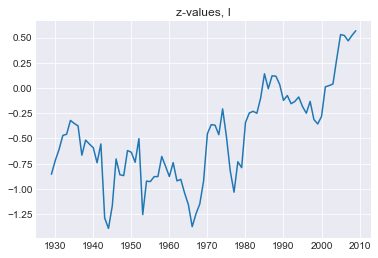

In [49]:
plt.plot(years, res[:,-1])
#plt.ylim(0,7.0)
plt.title('z-values, I')

### Local spatial autocorrelation

#### For the initial year

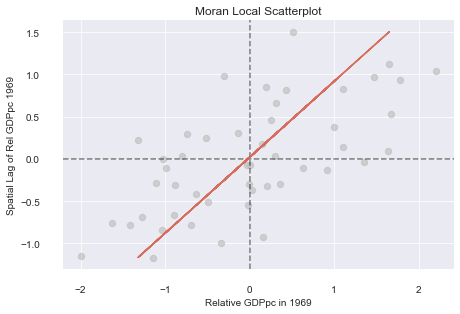

In [50]:
moran_loc1 = Moran_Local(y1, w)
fig, ax = moran_scatterplot(moran_loc1)
ax.set_xlabel('Relative GDPpc in 1969')
ax.set_ylabel('Spatial Lag of Rel GDPpc 1969')
plt.show()

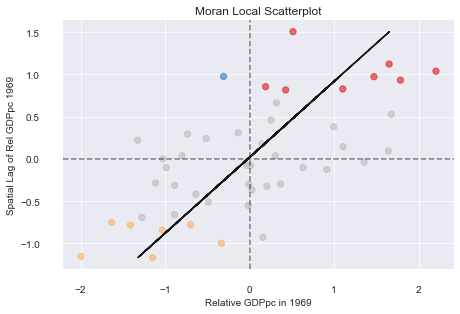

In [51]:
fig, ax = moran_scatterplot(moran_loc1, p=0.05)
ax.set_xlabel('Relative GDPpc in 1969')
ax.set_ylabel('Spatial Lag of Rel GDPpc 1969')
plt.show()

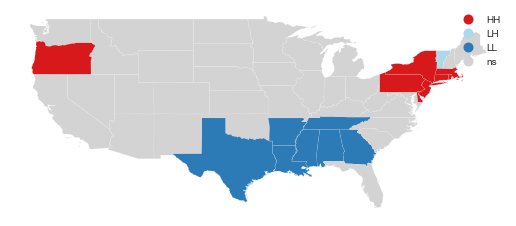

In [52]:
lisa_cluster(moran_loc1, gdf, p=0.05, figsize = (9,9))
plt.show()

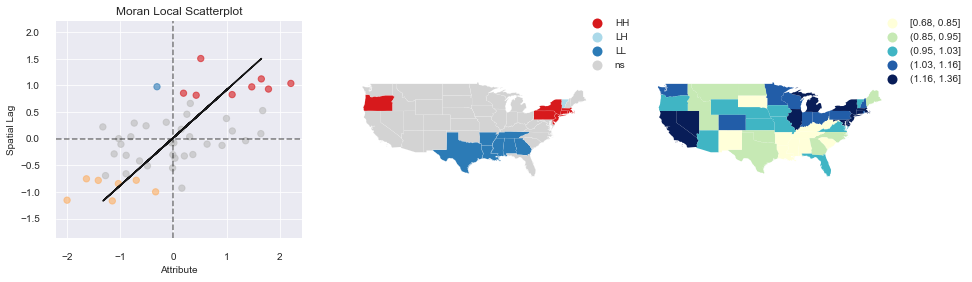

In [53]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc1, gdf, "1969_rel")
plt.show()

#### For the final year

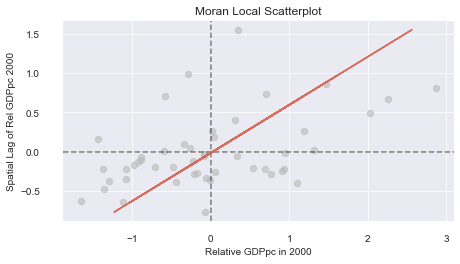

In [54]:
moran_loc2 = Moran_Local(y2, w)
fig, ax = moran_scatterplot(moran_loc2)
ax.set_xlabel('Relative GDPpc in 2000')
ax.set_ylabel('Spatial Lag of Rel GDPpc 2000')
plt.show()

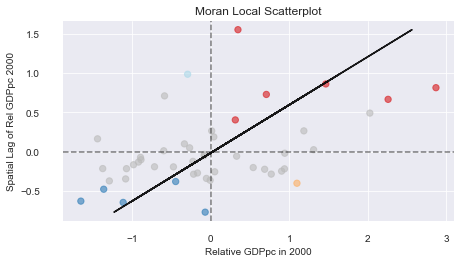

In [55]:
fig, ax = moran_scatterplot(moran_loc2, p=0.05)
ax.set_xlabel('Relative GDPpc in 2000')
ax.set_ylabel('Spatial Lag of Rel GDPpc 2000')
plt.show()

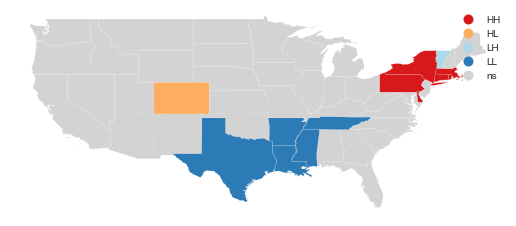

In [56]:
lisa_cluster(moran_loc2, gdf, p=0.05, figsize = (9,9))
plt.show()

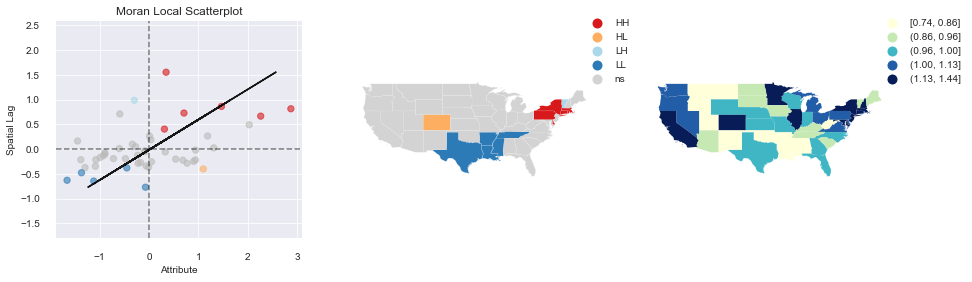

In [57]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc2, gdf, "2000_rel")
plt.show()

### Create rose object

In [58]:
# create rose object
Y = np.array([y1, y2]).T
rose = Rose(Y, w, k=5)

In [59]:
Y

array([[1.14848363, 1.11856702],
       [0.92058097, 0.80071489],
       [0.88021445, 0.90906632],
       [0.85554602, 0.88937573],
       [0.8395676 , 0.92652175],
       [1.00467789, 0.96608031],
       [1.05149184, 1.00162979],
       [0.91637612, 0.8578708 ],
       [0.94973457, 0.95440787],
       [1.05934089, 1.13889622],
       [1.03074794, 1.00581626],
       [1.04952958, 1.18257029],
       [1.02373986, 0.9480927 ],
       [1.17931917, 1.34790023],
       [1.00131401, 0.98733195],
       [1.2903271 , 1.2256767 ],
       [1.06943252, 1.04800023],
       [1.35872593, 1.44184737],
       [1.08344867, 1.0531801 ],
       [1.2684619 , 1.31210239],
       [1.04111989, 0.95831051],
       [1.26706029, 1.08312397],
       [0.86984249, 0.84818516],
       [1.27266675, 1.14506948],
       [1.10279097, 1.00759019],
       [1.22052666, 1.14450183],
       [1.2393083 , 1.10888138],
       [0.78434396, 0.77751194],
       [1.17987981, 1.20172869],
       [1.03327084, 1.16898201],
       [0.

In [60]:
rose

### Calculate Local Moran

In [61]:
# calculate Moran_Local
moran_loc1 = esda.moran.Moran_Local(y1, w)
moran_loc2 = esda.moran.Moran_Local(y2, w)

In [62]:
moran_loc1

## Plotting dynamic lisas

In [63]:
from splot.giddy import (dynamic_lisa_heatmap,
                         dynamic_lisa_rose,
                         dynamic_lisa_vectors,
                         dynamic_lisa_composite,
                         dynamic_lisa_composite_explore)
import splot

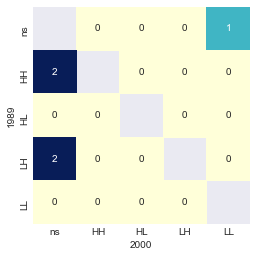

In [70]:
fig, ax = dynamic_lisa_heatmap(rose)
ax.set_ylabel(1989)
ax.set_xlabel(2000)
plt.show()

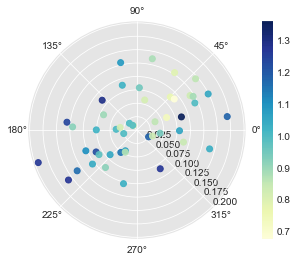

In [71]:
fig, ax = dynamic_lisa_rose(rose, attribute=y1)
plt.show()

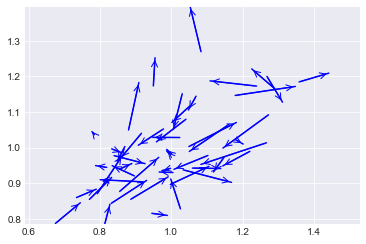

In [72]:
fig, ax = dynamic_lisa_vectors(rose)

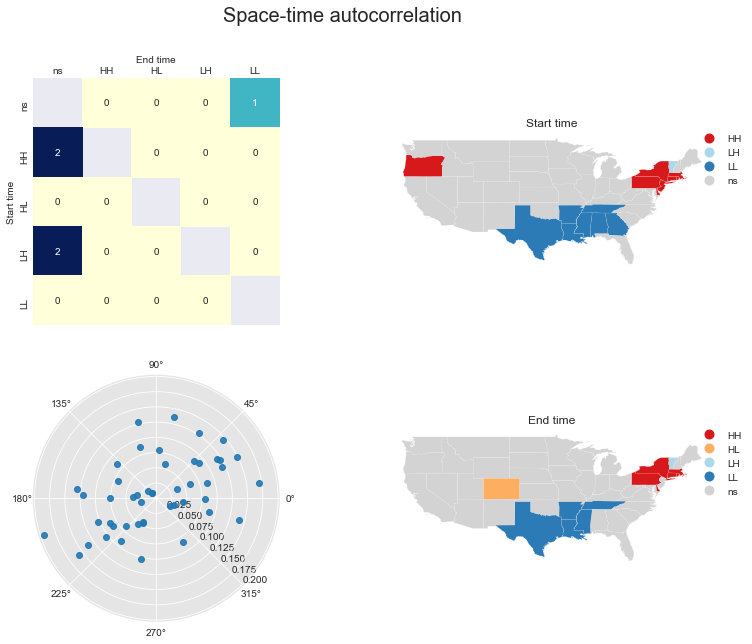

In [73]:
dynamic_lisa_composite(rose, gdf)
plt.show()

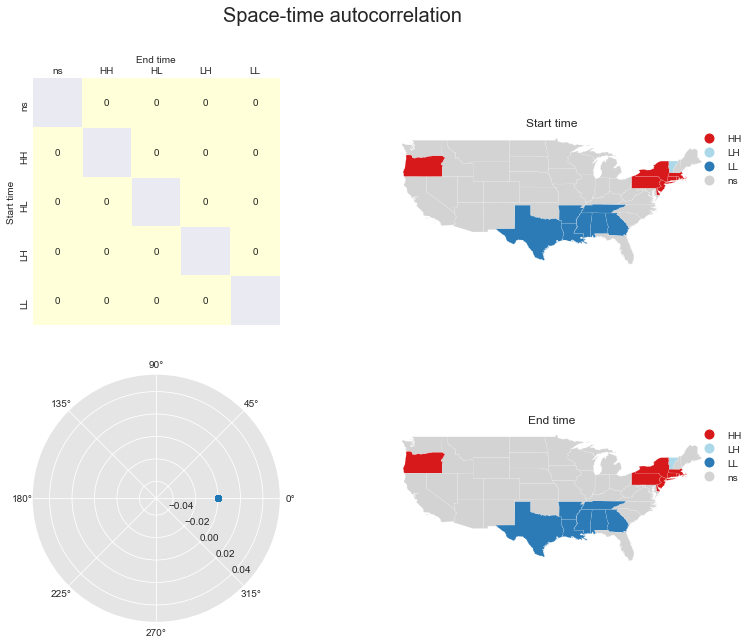

In [75]:
dynamic_lisa_composite_explore(rose, gdf, pattern='rel')
plt.show()